In [1]:
import pandas as pd
import numpy as np

In [2]:
#3_TO-DO_Excercise
#Problem_1
#1
diabetes = pd.read_csv("C:/Users/Natsu Rohit/Downloads/diabetes_.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.shape

(768, 9)

In [7]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
#2
columns_with_zero = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for col in columns_with_zero:
    diabetes[col] = diabetes[col].replace(0,diabetes[col].mean())

In [15]:
for col in columns_with_zero:
    print(col, "No. of zeros left:",(diabetes[col] == 0).sum())

Glucose No. of zeros left: 0
BloodPressure No. of zeros left: 0
SkinThickness No. of zeros left: 0
Insulin No. of zeros left: 0
BMI No. of zeros left: 0


In [16]:
#3
X = diabetes.drop("Outcome",axis=1).values
Y = diabetes["Outcome"].values
def train_test_split_scratch(X,Y,test_size=0.3,random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    test_count = int(len(X) * test_size)
    test_indices = indices[:test_count]
    train_indices = indices[test_count:]
    X_train = X[train_indices]
    X_test = X[test_indices]
    Y_train = Y[train_indices]
    Y_test = Y[test_indices]
    return X_train,X_test,Y_train,Y_test

X_train,X_test,Y_train,Y_test = train_test_split_scratch(X,Y)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(538, 8) (230, 8)
(538,) (230,)


In [19]:
#4
def euclidean_distance(a,b):
    return np.sqrt(np.sum((a-b)**2))
def knn_predict_single(query, X_train, Y_train, k = 3):
    distances = [euclidean_distance(query,x) for x in X_train]
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = Y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction
def knn_predict(X_test,X_train,Y_train,k=3):
    predictions = [knn_predict_single(x,X_train,Y_train,k) for x in X_test]
    return np.array(predictions)
def compute_accuracy(Y_true,Y_pred):
    return (np.sum(Y_true == Y_pred)/len(Y_true)) * 100

In [20]:
predictions = knn_predict(X_test, X_train, Y_train, k=3)
accuracy = compute_accuracy(Y_test, predictions)
print(f"Accuracy (unscaled data): {accuracy:.2f}%")

Accuracy (unscaled data): 70.43%


In [27]:
#Problem-2-Experimentation:
def min_max_scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = min_max_scale(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, Y)
pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
accuracy_scaled = compute_accuracy(y_test_s, pred_scaled)
print(f"Accuracy (scaled data) : {accuracy_scaled:.2f}%")

"""Thus scaling improved KNN performance because Euclidean distance is sensitive to feature
magnitude. After scaling, all the features contributed equally, resulting in better
neighbor selection and improved accuracy.
"""

Accuracy (scaled data) : 75.22%


'Thus scaling improved KNN performance because Euclidean distance is sensitive to feature\nmagnitude. After scaling, all the features contributed equally, resulting in better\nneighbor selection and improved accuracy.\n'

In [32]:
#Problem-3-Experimentation with k
import time
import matplotlib.pyplot as plt
k_values = range(1,16)
acc_original = []
acc_scaled = []
time_original = []
time_scaled = []

for k in k_values:
    start = time.time()
    pred = knn_predict(X_test, X_train, Y_train, k)
    time_original.append(time.time() - start)
    acc_original.append(compute_accuracy(Y_test, pred))

    start = time.time()
    pred_s = knn_predict(X_test_s, X_train_s, y_train_s, k)
    time_scaled.append(time.time() - start)
    acc_scaled.append(compute_accuracy(y_test_s, pred_s))

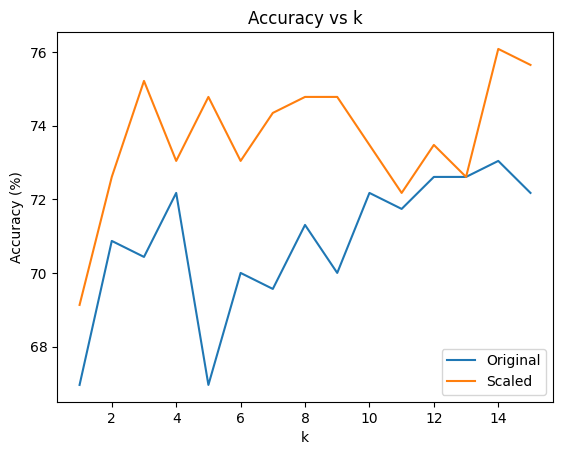

In [33]:
#Accuracy vs k plot
plt.figure()
plt.plot(k_values, acc_original, label = "Original")
plt.plot(k_values, acc_scaled, label = "Scaled")
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs k")
plt.legend()
plt.show()

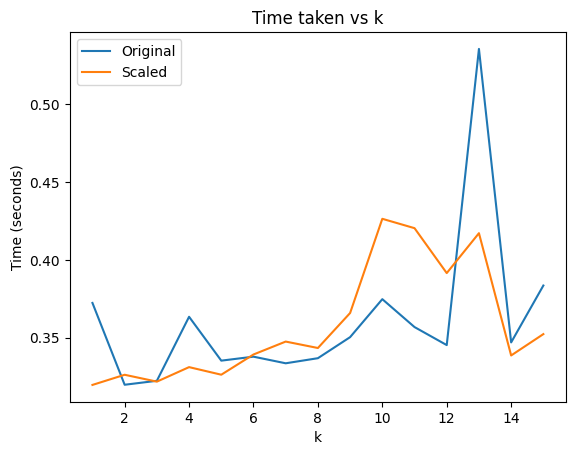

In [34]:
#Time vs k plot
plt.figure()
plt.plot(k_values, time_original, label = "Original")
plt.plot(k_values, time_scaled, label = "Scaled")
plt.xlabel("k")
plt.ylabel("Time (seconds)")
plt.title("Time taken vs k")
plt.legend()
plt.show()

In [35]:
"""As k increase, accuracy initially improves due to reduced noise but later stabilizes
or decreases due to over smoothing. Larger k values also increase the computational cost
because more neighbors must be considered."""

'As k increase, accuracy initially improves due to reduced noise but later stabilizes\nor decreases due to over smoothing. Larger k values also increase the computational cost\nbecause more neighbors must be considered.'

In [36]:
#Problem-4:
#Challenges of KNN:
"""
Slow for large datasets
High memory usage
Poor performance in high dimensions(Curse of dimensionality)
"""

#Improvements of KNN:
"""
Feature Scaling
Dimensionality reduction(PCA)
Approximate nearest neighbors
Using KD-Tree / Ball-Tree
"""

'\nFeature Scaling\nDimensionality reduction(PCA)\nApproximate nearest neighbors\nUsing KD-Tree / Ball-Tree\n'